<a href="https://www.kaggle.com/code/kaixiongf/company-bankruptcy?scriptVersionId=103936702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table Of Contents**
​
* [1. Introduction](#section-one)
* [2. Understanding Shape of Data](#section-two)
* [3. Data Cleaning and Exploration](#section-three)
    - [3.1 Missing Values and Cleaning](#subsection-three.one)
    - [3.2 Distribution of all Features](#subsection-three.one)
    - [3.3 Sub Sampling](#subsection-three.one)
* [4. Feature Engineering](#section-four)
    - [4.1 Correlation/Heatmap](#subsection-four.one)
    - [4.2 Distribution of Features after sub-sampling](#subsection-four.two)
    - [4.3 Boxplot](#subsection-four.three)
    - [4.4 IQR Outlier removal](#subsection-four.four)
    - [4.5 Distribution of Features After Outlier Removal](#subsection-four.four)
    - [4.6 Boxplot After Outlier Removal](#subsection-four.four)
* [5. Data Preprocessing](#section-five)
    - [5.1 Feature Encoding](#subsection-four.one)
    - [5.2 Log Transform Skewed data](#subsection-four.one)
    - [5.3 Feature Scaling](#subsection-four.one)
* [6. Model Building](#section-six)
* [7. Model Tuning w. Optuna](#section-seven)
* [8. Ensembling](#section-eight)
* [9. Model Verification](#section-nine)
    - [9.1 Cross Validation](#subsection-nine.one)
    - [9.2 Learning Curve](#subsection-nine.two)
    - [9.3 AUC-ROC](#subsection-nine.three)
* [Conclusion](#section-ten)

**Would Appreciate and Upvote! Thank you**

# **1. Introduction**

## Setting Up the Environment

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy_df = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
bankruptcy_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# **2. Understanding the Shape of Data**

In [3]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bankruptcy_df.shape

(6819, 96)

In [5]:
bankruptcy_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# **3. Data Cleaning and Exploration**

## **3.1 Missing Values and Cleaning**

In [6]:
bankruptcy_df.columns[bankruptcy_df.isna().any()]

Index([], dtype='object')

Great! No missing values

In [7]:
# Adjust column names
def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [8]:
bank_columns = list(bankruptcy_df.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
bankruptcy_df.columns = bank_columns
display(bankruptcy_df.columns)

Index(['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit

<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

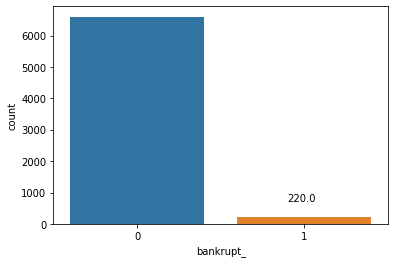

In [9]:
class_bar=sns.countplot(data=bankruptcy_df,x="bankrupt_")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

## 3.2 Distribution of All Features

* Checking for skews

In [10]:
# Return true/false if skewed
import scipy.stats
skew_df = pd.DataFrame(bankruptcy_df.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(bankruptcy_df[feature])) 

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x>= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)

,Feature,Skew,Absolute Skew,Skewed
0,bankrupt_,5.294223,5.294223,True
1,roa_c_before_interest_and_depreciation_before_...,-0.323870,0.323870,False
2,roa_a_before_interest_and_%_after_tax,-1.033499,1.033499,True
3,roa_b_before_interest_and_depreciation_after_tax,-0.763396,0.763396,True
4,operating_gross_margin,-8.041599,8.041599,True
5,realized_sales_gross_margin,-8.064798,8.064798,True
6,operating_profit_rate,-70.221713,70.221713,True
7,pre_tax_net_interest_rate,-52.471321,52.471321,True
8,after_tax_net_interest_rate,-52.984085,52.984085,True
9,non_industry_income_and_expenditure_revenue,39.632969,39.632969,True


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


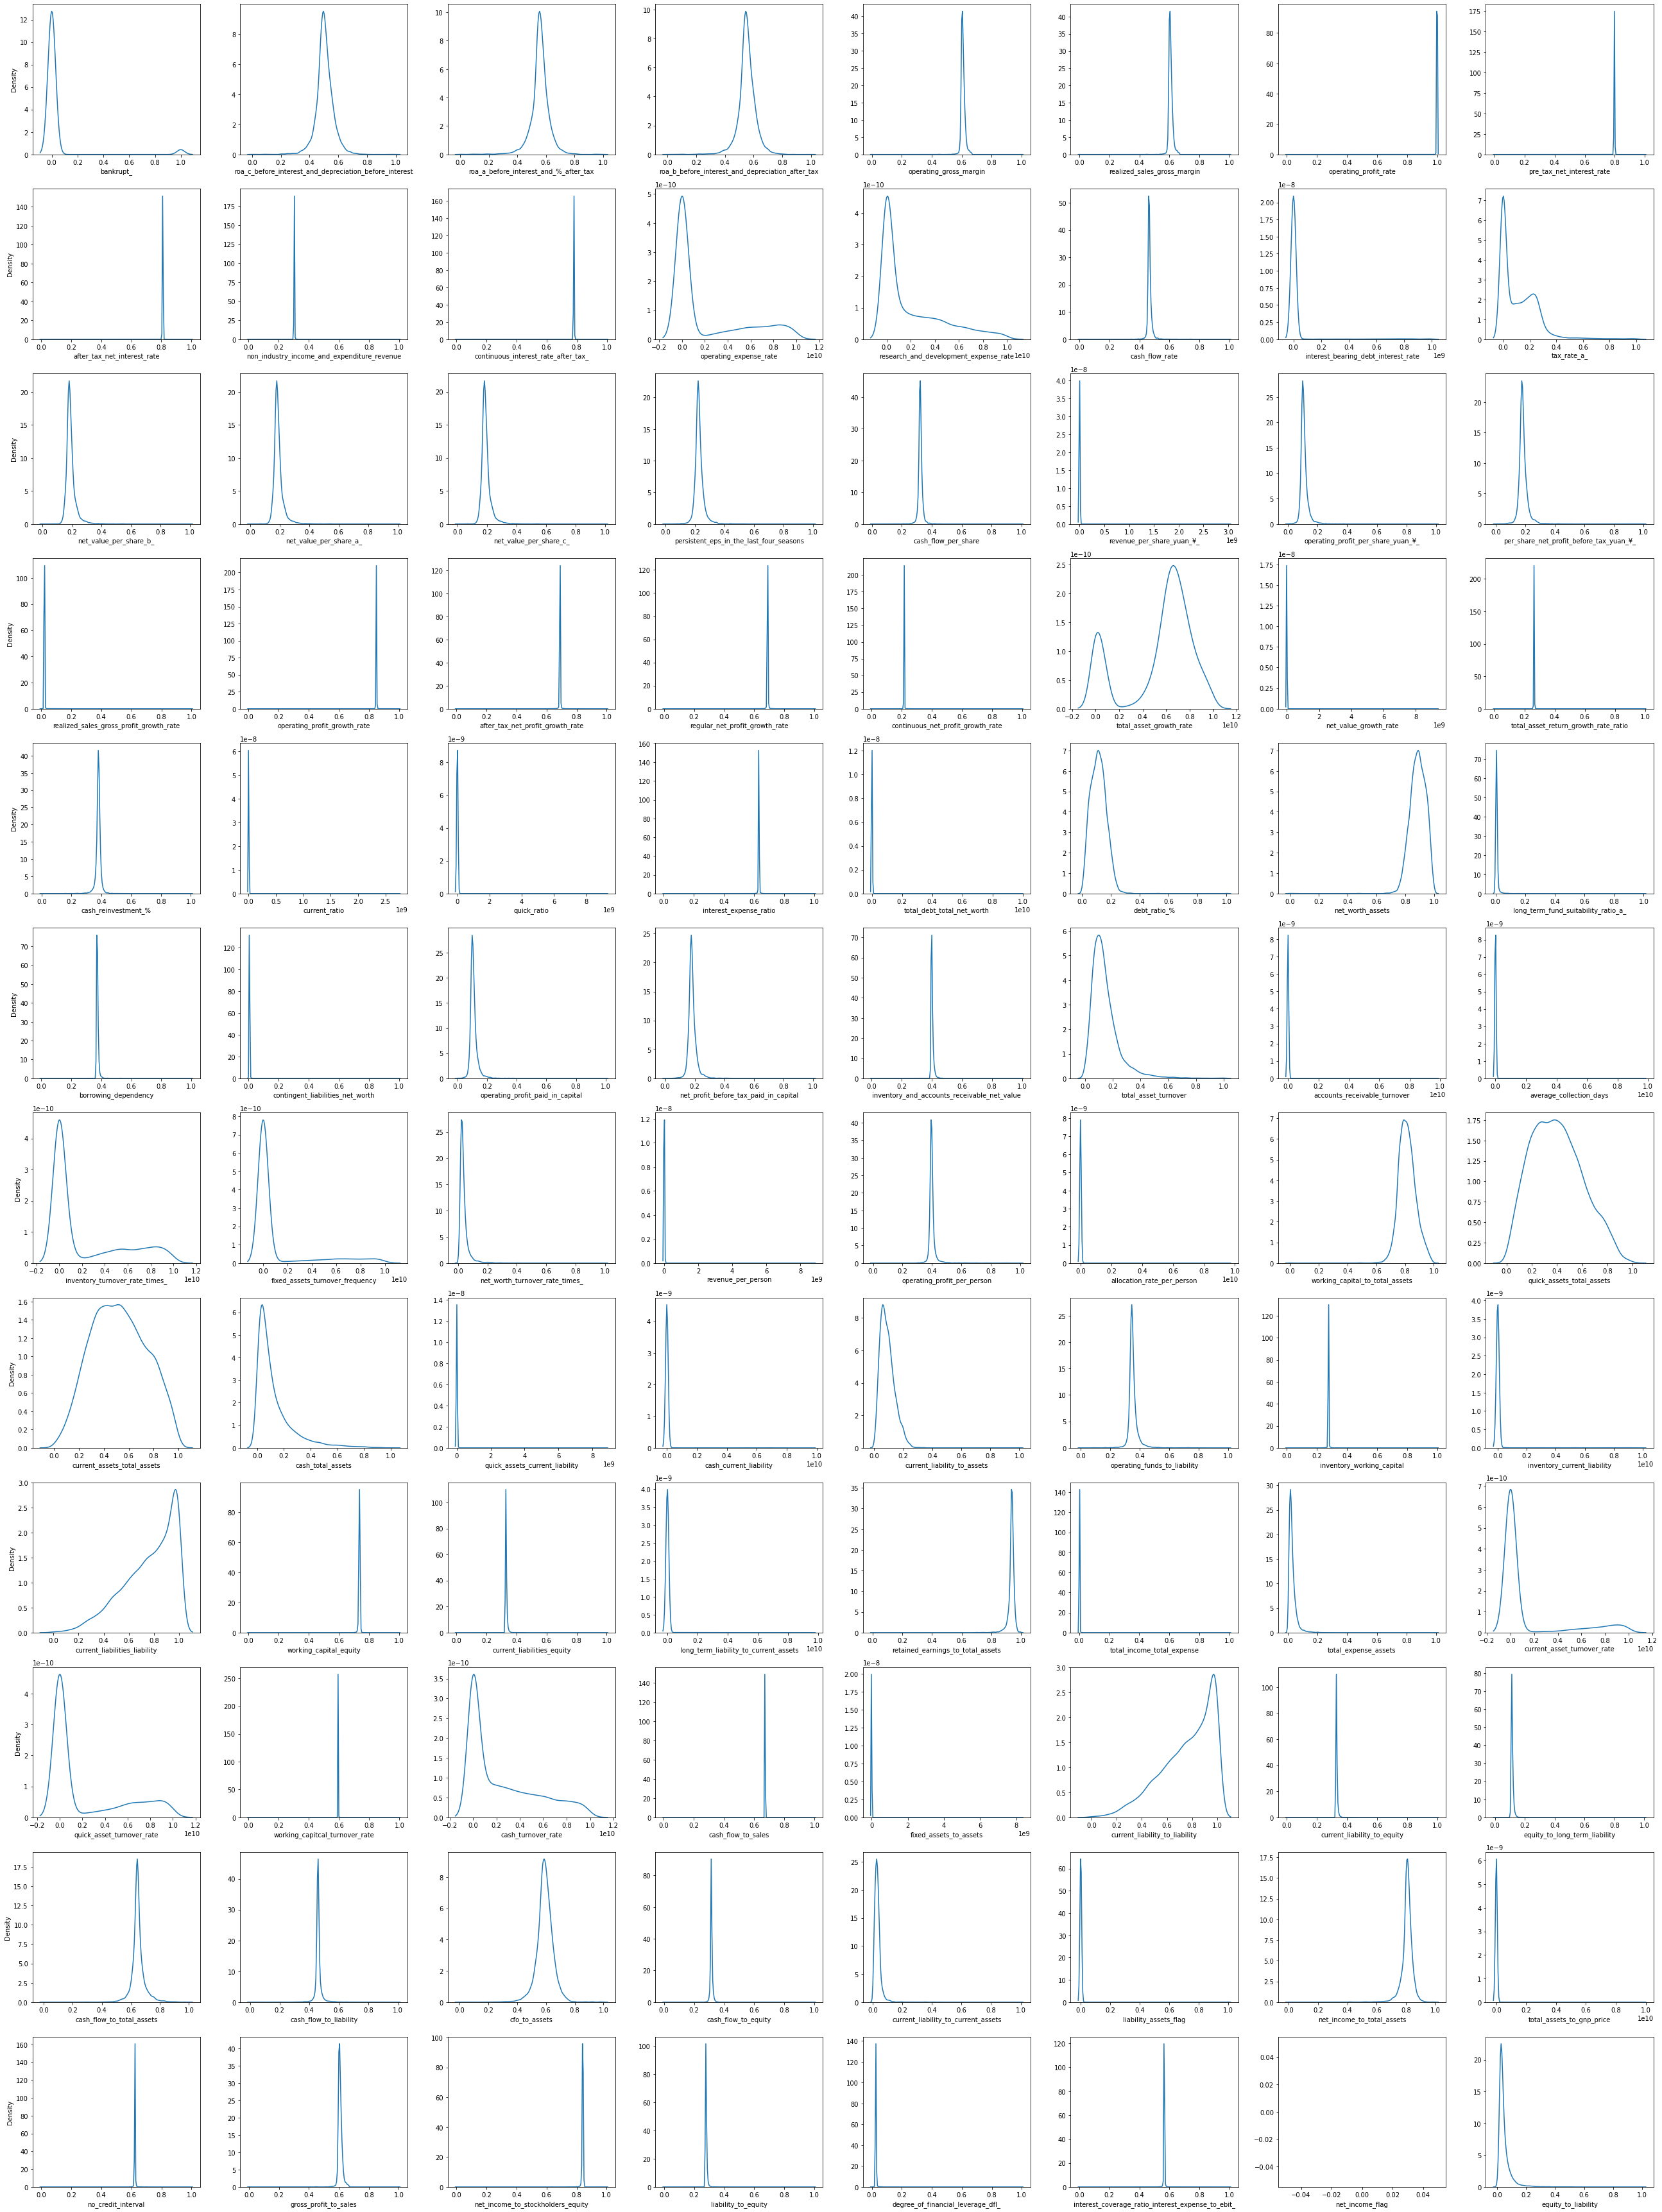

In [11]:
# Visualisation of distributions
cols = list(bankruptcy_df.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_df[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

In [12]:
query_skew=skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows", 1000):
    display(query_skew)

0                                             bankrupt_
2                 roa_a_before_interest_and_%_after_tax
3      roa_b_before_interest_and_depreciation_after_tax
4                                operating_gross_margin
5                           realized_sales_gross_margin
6                                 operating_profit_rate
7                             pre_tax_net_interest_rate
8                           after_tax_net_interest_rate
9           non_industry_income_and_expenditure_revenue
10                  continuous_interest_rate_after_tax_
11                               operating_expense_rate
12                research_and_development_expense_rate
13                                       cash_flow_rate
14                  interest_bearing_debt_interest_rate
15                                          tax_rate_a_
16                               net_value_per_share_b_
17                               net_value_per_share_a_
18                               net_value_per_s

**Sub-sample dataset where bankrupt vs non bankrupt is 50/50, after which check for skews an decide if log transform is required, additionally conduct a correlation matrix analysis**

## **3.3 Subsampling**

Sub-sample dataset where bankrupt vs non bankrupt is 50/50

In [13]:
bankruptcy_df2 = bankruptcy_df.sample(frac=1) #Shuffle Bankruptcy df

bankruptcy_df_b = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 1]
bankruptcy_df_nb = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 0][:220]

bankruptcy_subdf_comb = pd.concat([bankruptcy_df_b,bankruptcy_df_nb])
bankruptcy_subdf = bankruptcy_subdf_comb.sample(frac=1,random_state=42)

bankruptcy_subdf

,bankrupt_,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_%_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,net_income_flag,equity_to_liability
749,0,0.513284,0.571849,0.570748,0.616440,0.616440,0.999094,0.797531,0.809450,0.303511,...,0.816229,0.001206,0.623638,0.616441,0.841531,0.278656,0.026913,0.565680,1,0.034584
1176,1,0.441184,0.498092,0.488677,0.595007,0.595007,0.998909,0.797123,0.809048,0.303185,...,0.769694,0.013448,0.619463,0.595002,0.837122,0.284086,0.026426,0.562495,1,0.020525
6370,0,0.486716,0.550807,0.532898,0.597688,0.597688,0.998987,0.797406,0.809324,0.303515,...,0.804304,0.007659,0.623949,0.597686,0.840925,0.283321,0.027272,0.566735,1,0.021436
6570,0,0.485156,0.560129,0.537556,0.640785,0.640785,0.998971,0.797628,0.809541,0.303937,...,0.813441,0.000902,0.624100,0.640784,0.840947,0.275542,0.026831,0.565342,1,0.122754
924,0,0.510554,0.567597,0.553616,0.605839,0.605839,0.999039,0.797517,0.809402,0.303601,...,0.814549,0.001185,0.623980,0.605837,0.841886,0.282363,0.026904,0.565645,1,0.022834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,1,0.466728,0.490078,0.501097,0.607850,0.607850,0.998855,0.797196,0.809109,0.303425,...,0.767057,0.008094,0.623321,0.607845,0.834982,0.293298,0.026485,0.563103,1,0.015432
6446,0,0.466338,0.537887,0.523850,0.604960,0.604960,0.998964,0.797381,0.809316,0.303521,...,0.799067,0.001051,0.623781,0.604958,0.840346,0.282192,0.030576,0.569097,1,0.023121
3277,0,0.610247,0.665667,0.677445,0.623798,0.623798,0.999325,0.797816,0.809719,0.303526,...,0.861016,0.001062,0.621625,0.623794,0.844647,0.278269,0.026824,0.565311,1,0.037216
4792,0,0.603861,0.647787,0.637186,0.600628,0.600628,0.999042,0.797488,0.809386,0.303544,...,0.864152,0.008938,0.624158,0.600625,0.844172,0.276797,0.026795,0.565179,1,0.055997


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

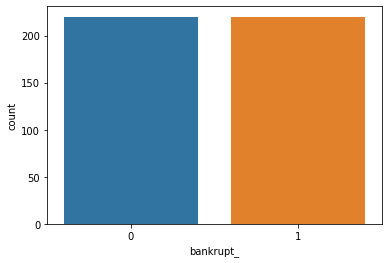

In [14]:
sns.countplot(bankruptcy_subdf["bankrupt_"])

220 randomly selected non bankruptcy companies were selected against 220 bankrupt companies.

# **4. Feature Engineering**

In [15]:
bankruptcy_subdf2 = bankruptcy_subdf.drop(["net_income_flag"],axis=1)
bankruptcy_subdf2.shape

(440, 95)

## **4.1 Correlation Matrix**

<AxesSubplot:>

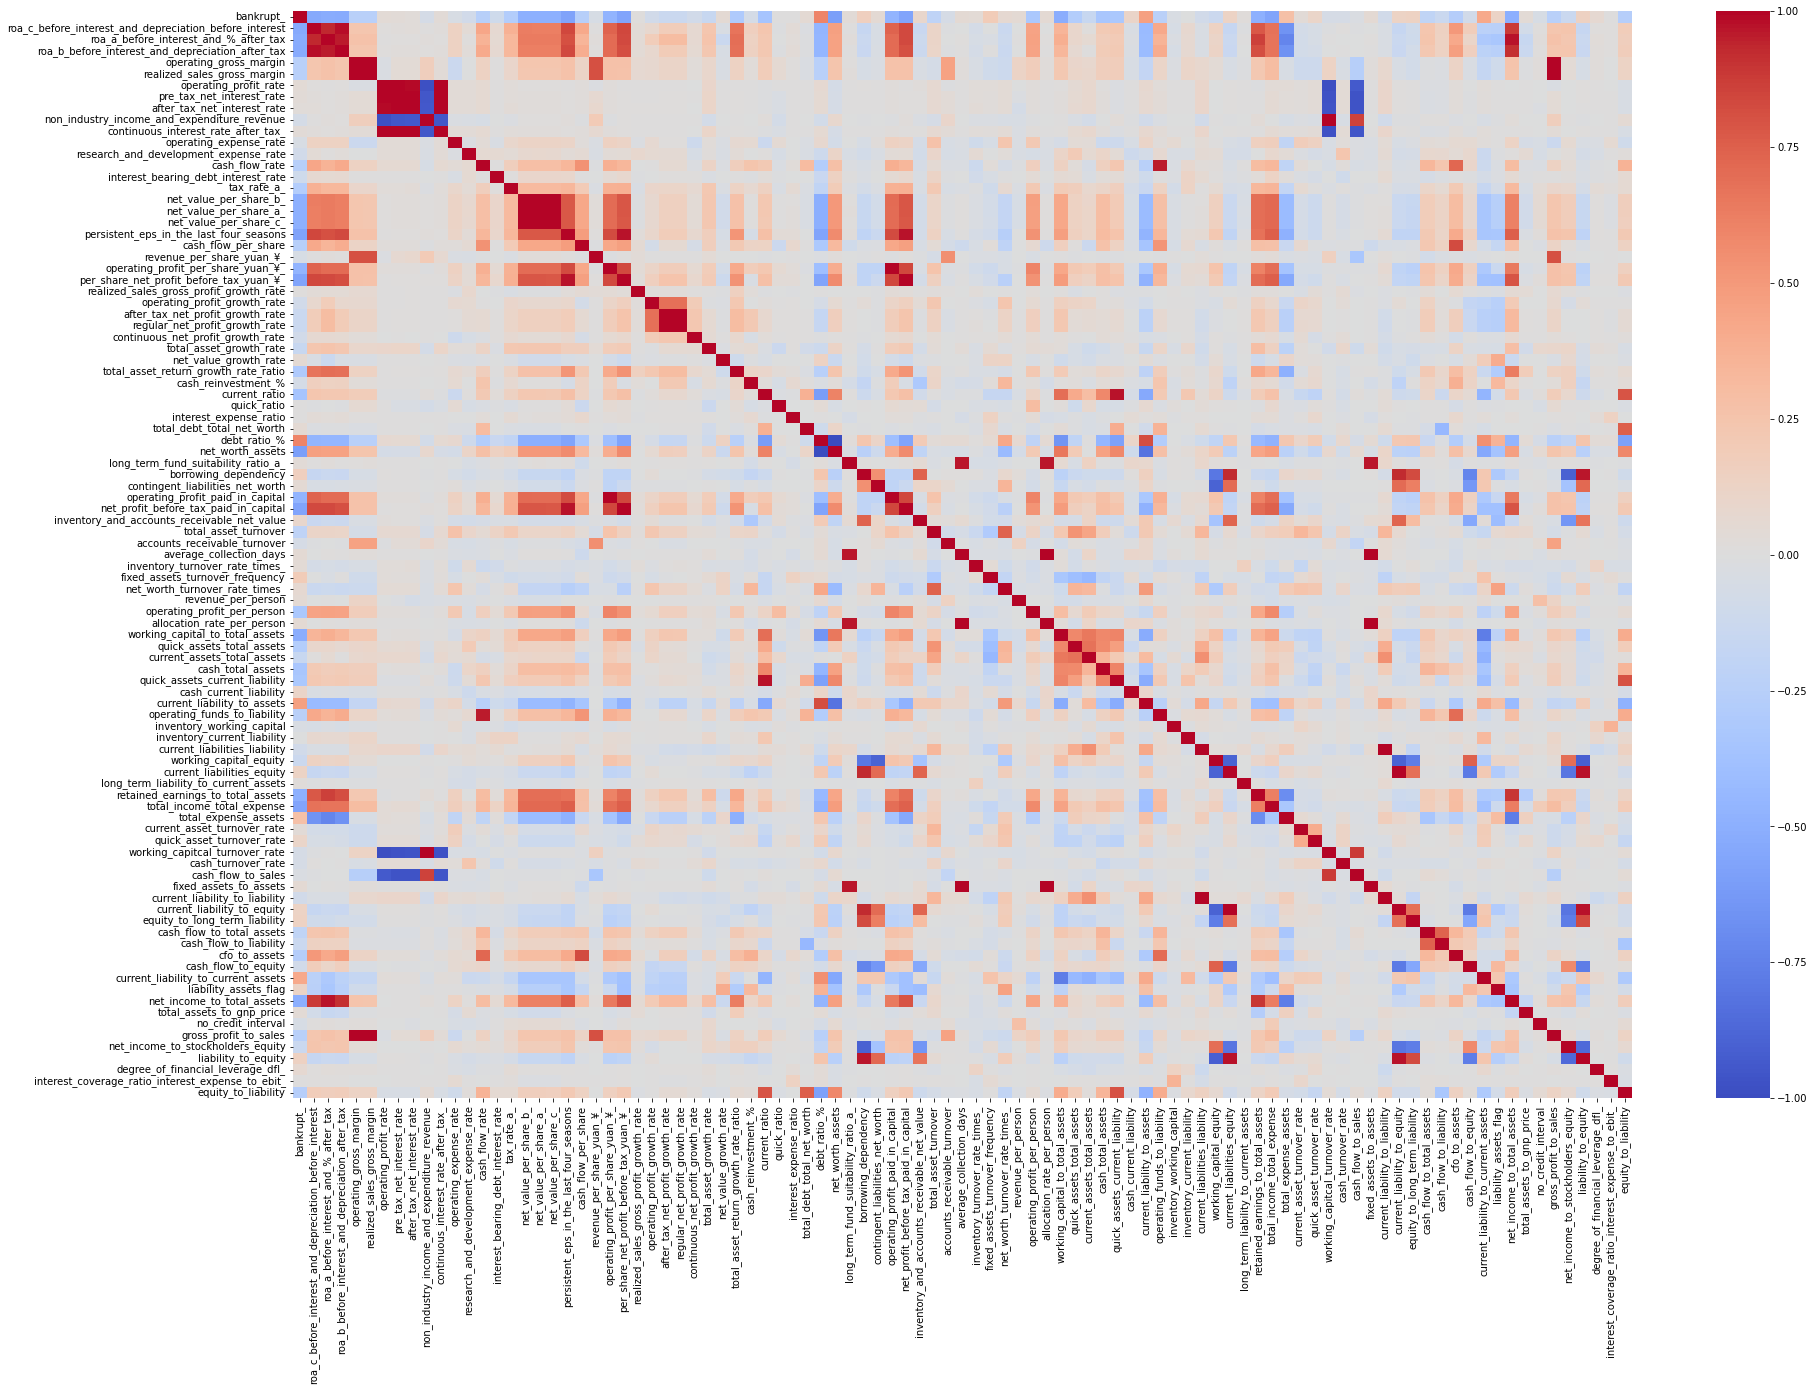

In [16]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(bankruptcy_subdf2.corr(),ax=ax1,cmap="coolwarm")

### **4.1.1 IDENTIFY HIGHEST AND LOWEST CORRELATION TO BANKRUPTCY AND ANALYSE RESULT*** \

Based on fundamental understanding of businesses that go bankrupt are few assets, high debt, low profitability and low cash flow. Can look in this direction

### **4.1.2 Visualise Distributions of most correlated to bankruptcy**

## **Visualtion of Distribution of All Features After Sub-Sampling**

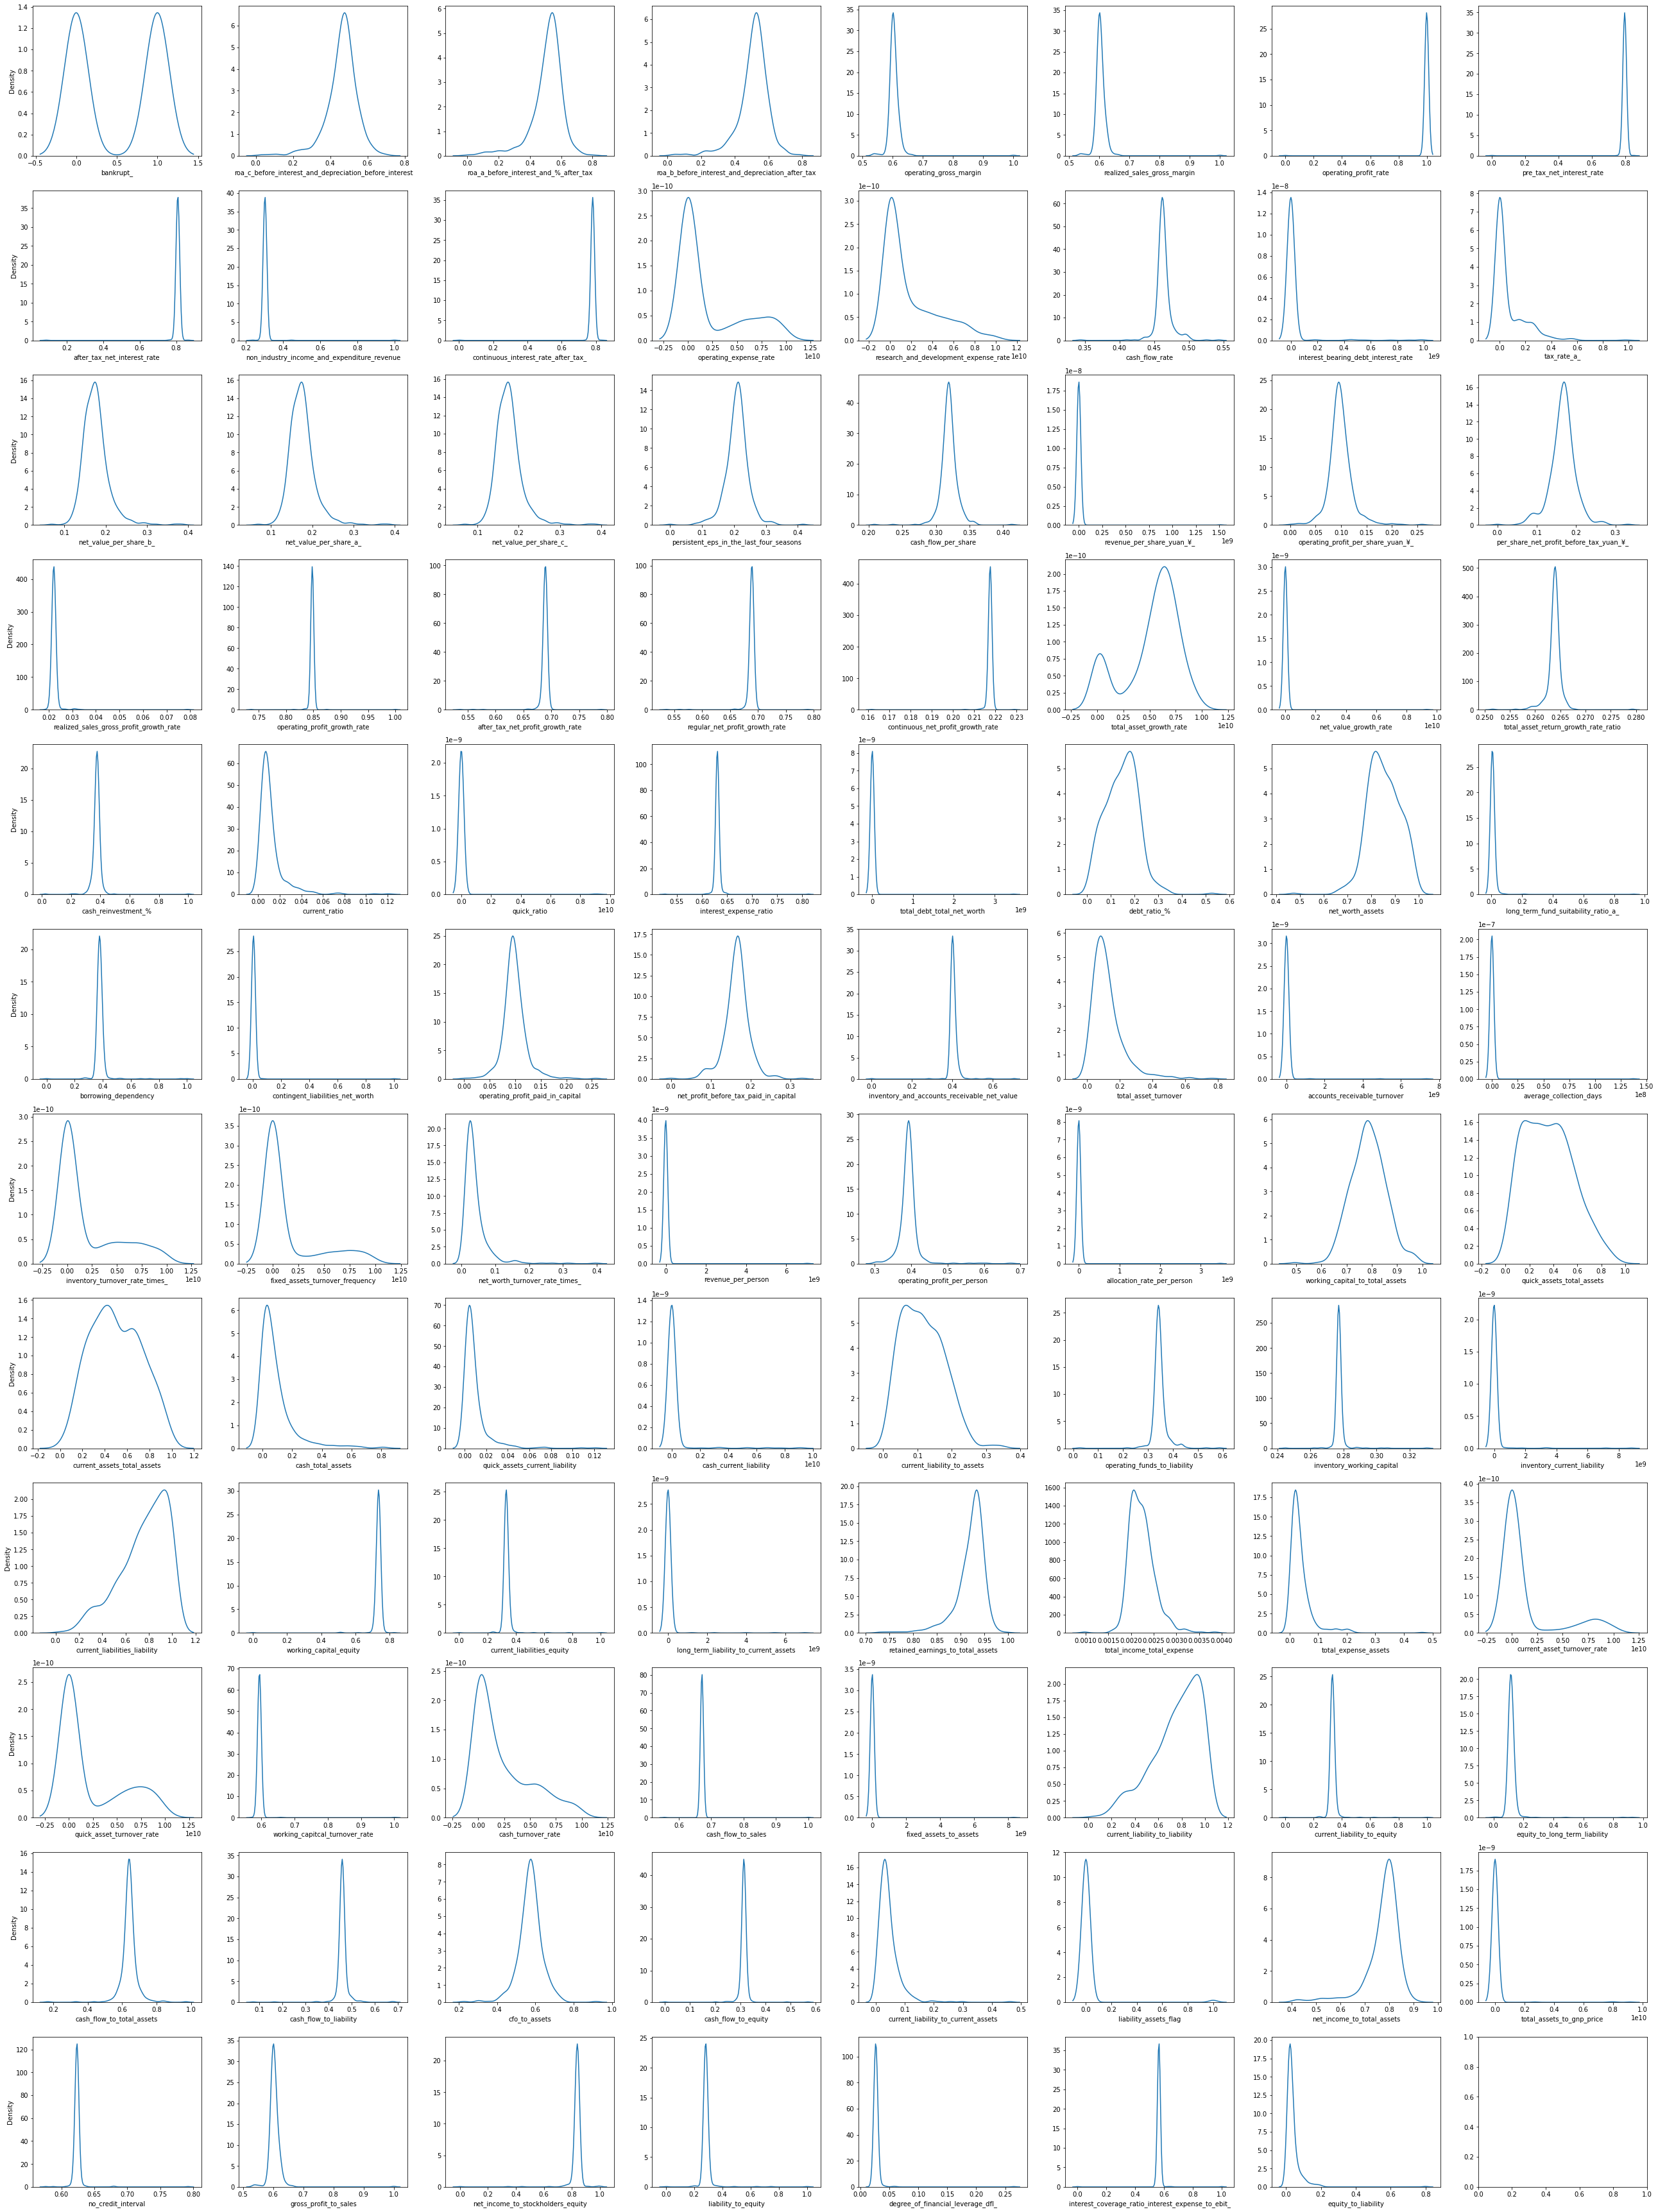

In [17]:
# Visualisation of distributions after sub-sampling
cols = list(bankruptcy_subdf2.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

## **4.3 Boxplot of All Features**

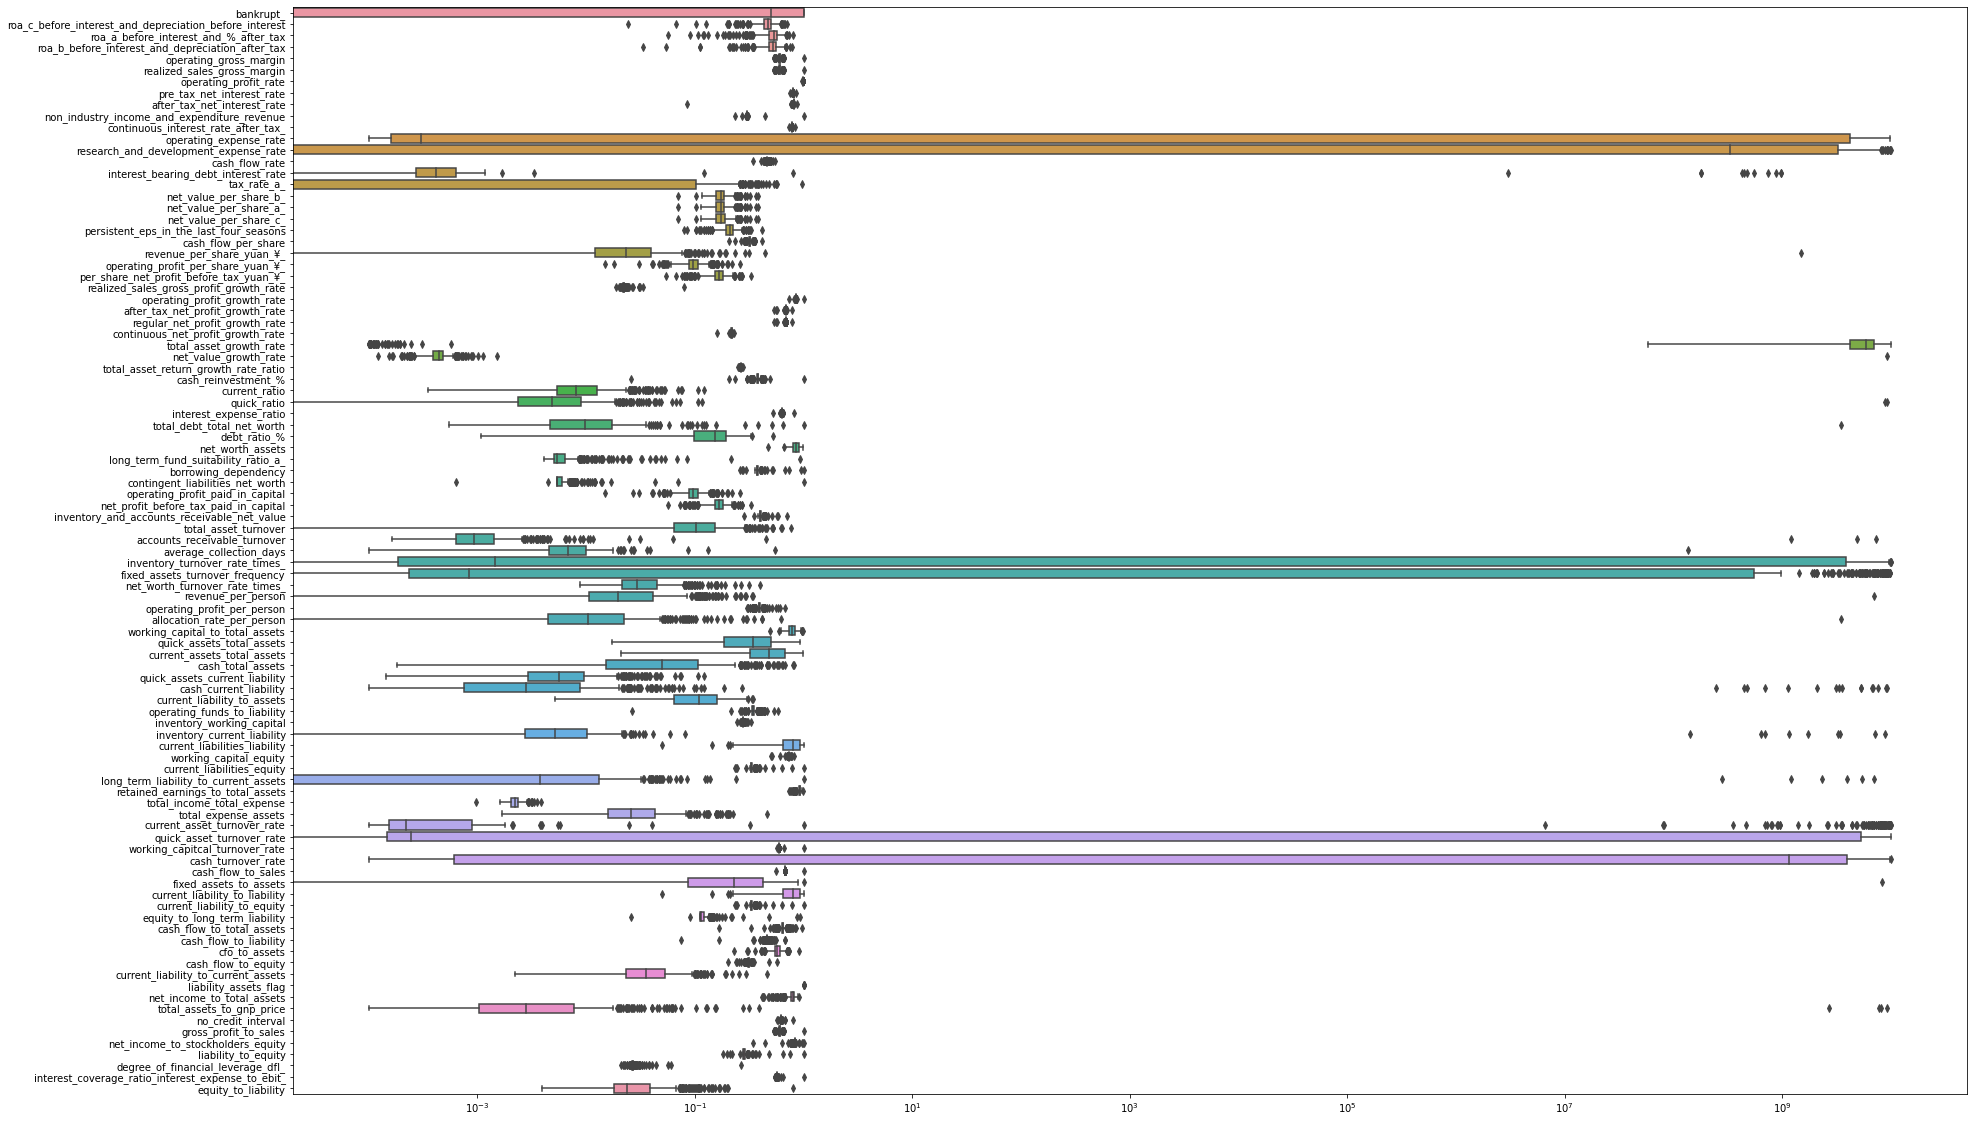

In [18]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=bankruptcy_subdf2,orient="h")
boxplot.set(xscale="log")
plt.show()